# Imports

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np_utils
%matplotlib inline

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, DepthwiseConv2D, Conv2D, SeparableConv2D, MaxPooling1D
from keras.layers import Input, concatenate
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import GlobalAveragePooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Nadam, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.regularizers import l2
%config InlineBackend.figure_format='retina'
from keras_contrib.callbacks import CyclicLR
from keras.models import Model
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from data_science_utils.vision.keras import *
from time import time
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import missingno as msno
import re
from joblib import Parallel, delayed
from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils import plots as plot_utils
from data_science_utils.dataframe import column as column_utils
from data_science_utils import misc as misc
from data_science_utils import preprocessing as pp_utils
from data_science_utils import nlp as nlp_utils

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from data_science_utils.dataframe import get_specific_cols

import numpy as np
import more_itertools
from more_itertools import flatten
import ast
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.


In [2]:
df_train = pd.read_csv("price_prediction/training.csv")
df_test = pd.read_csv("price_prediction/public_test_features.csv")

# Checking Missing Values

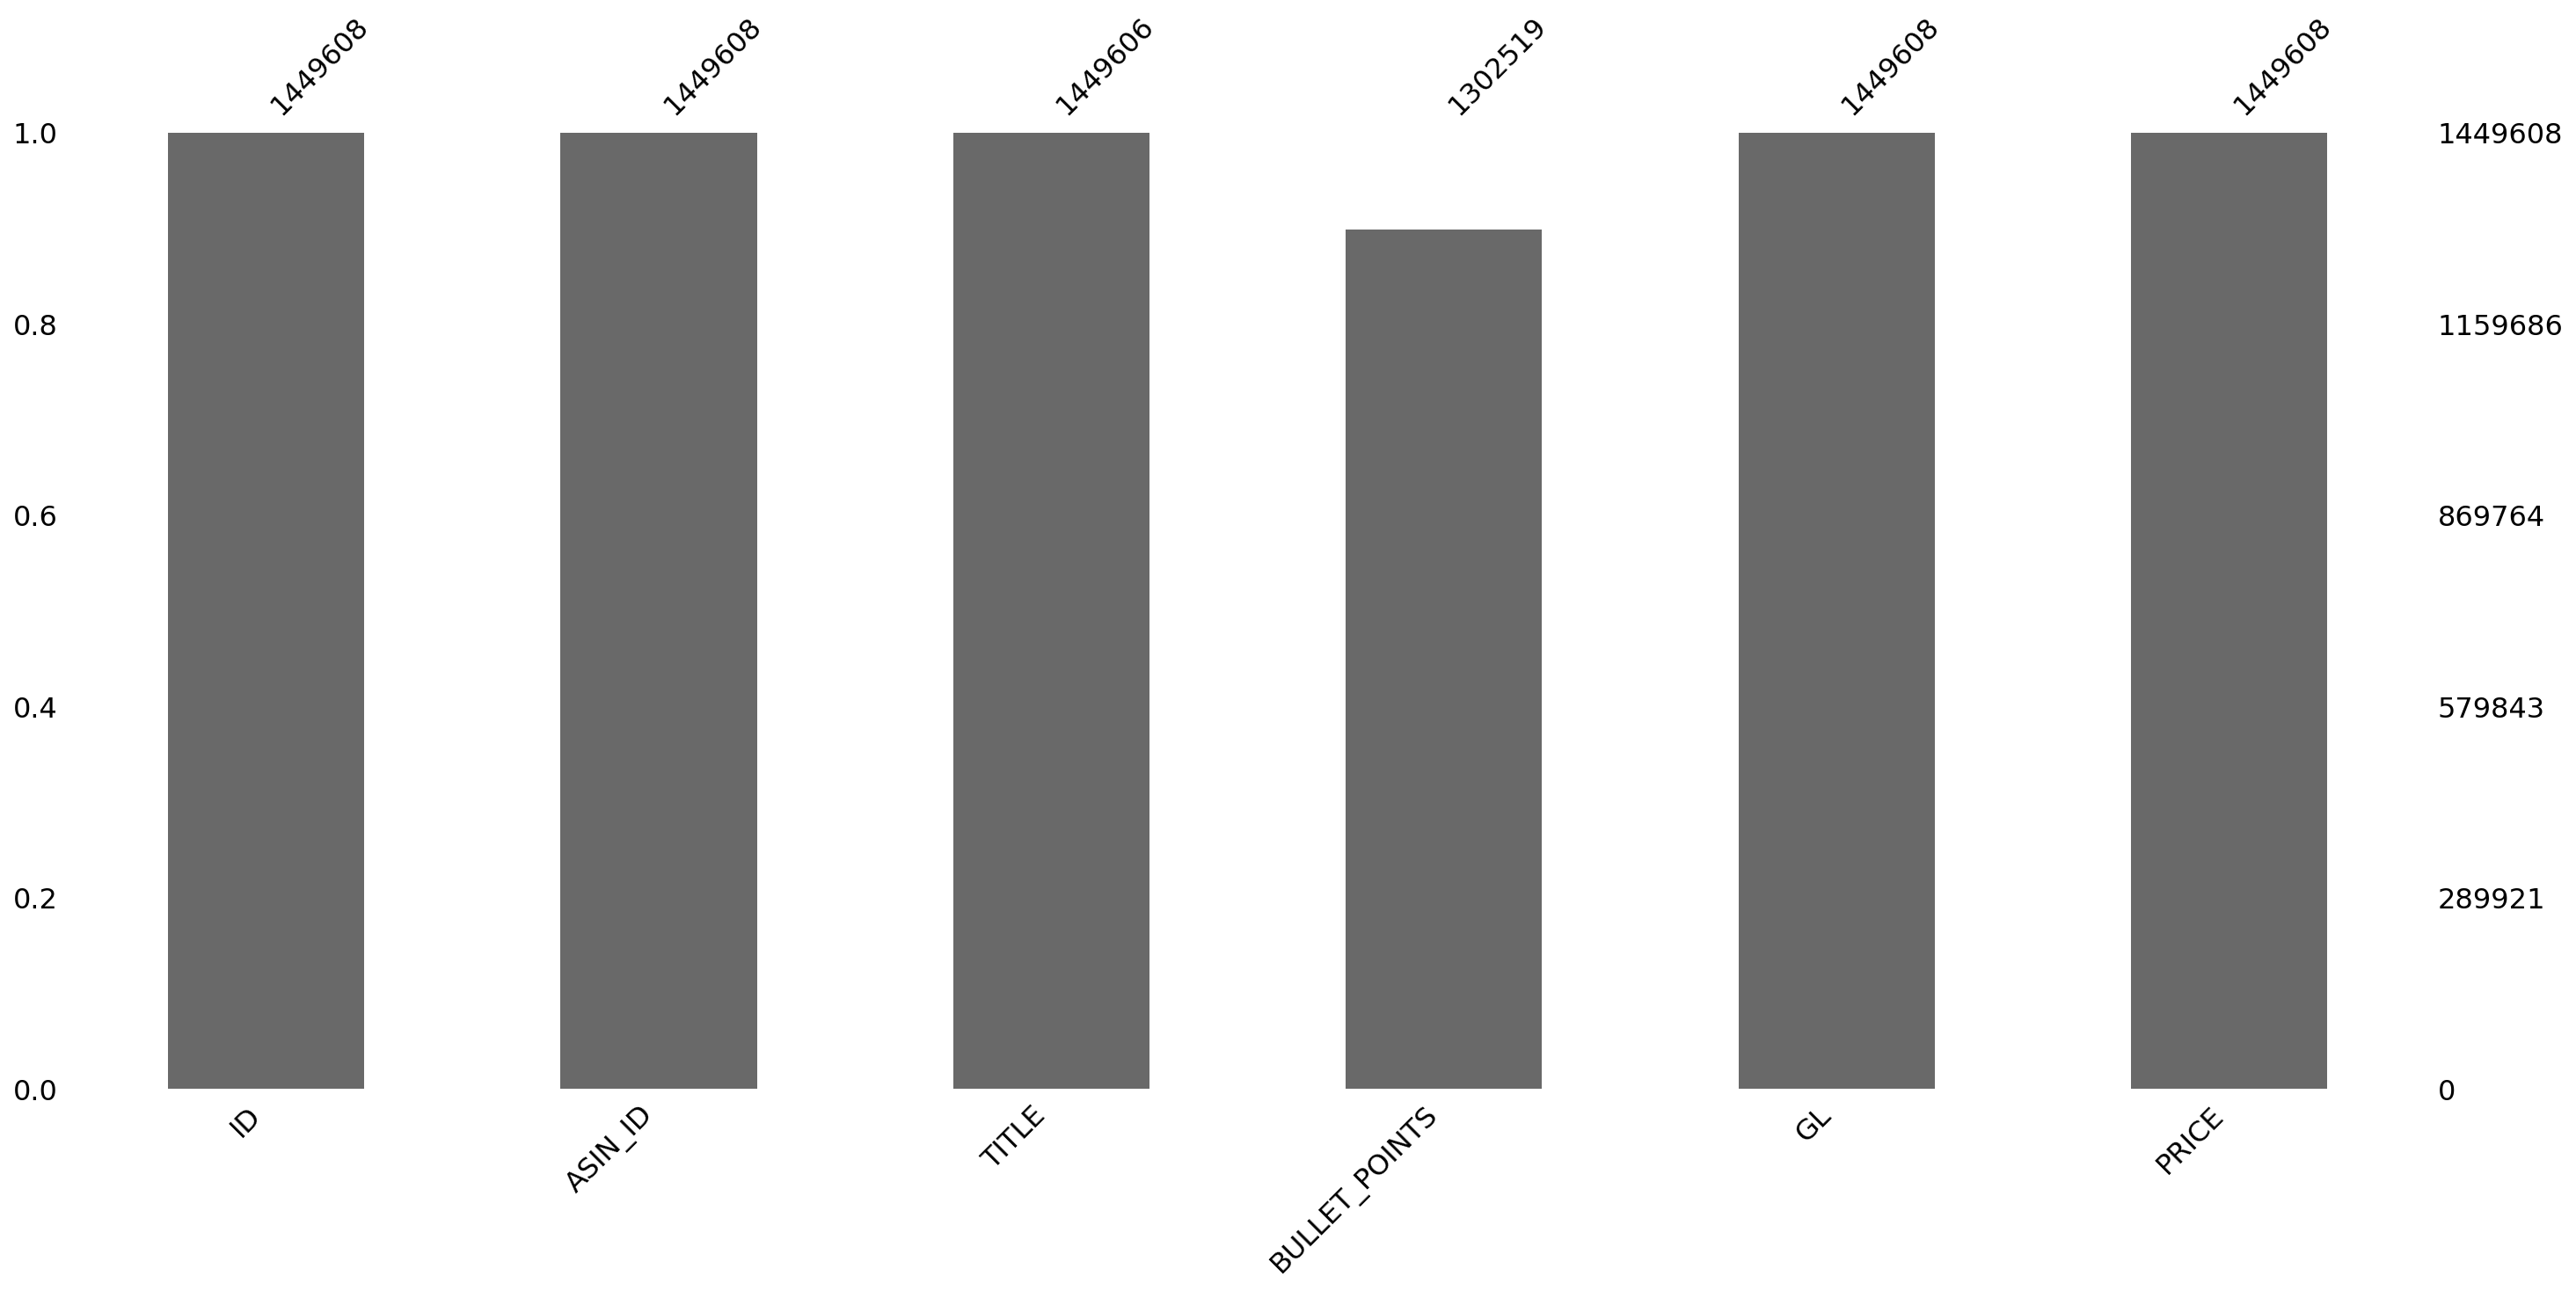

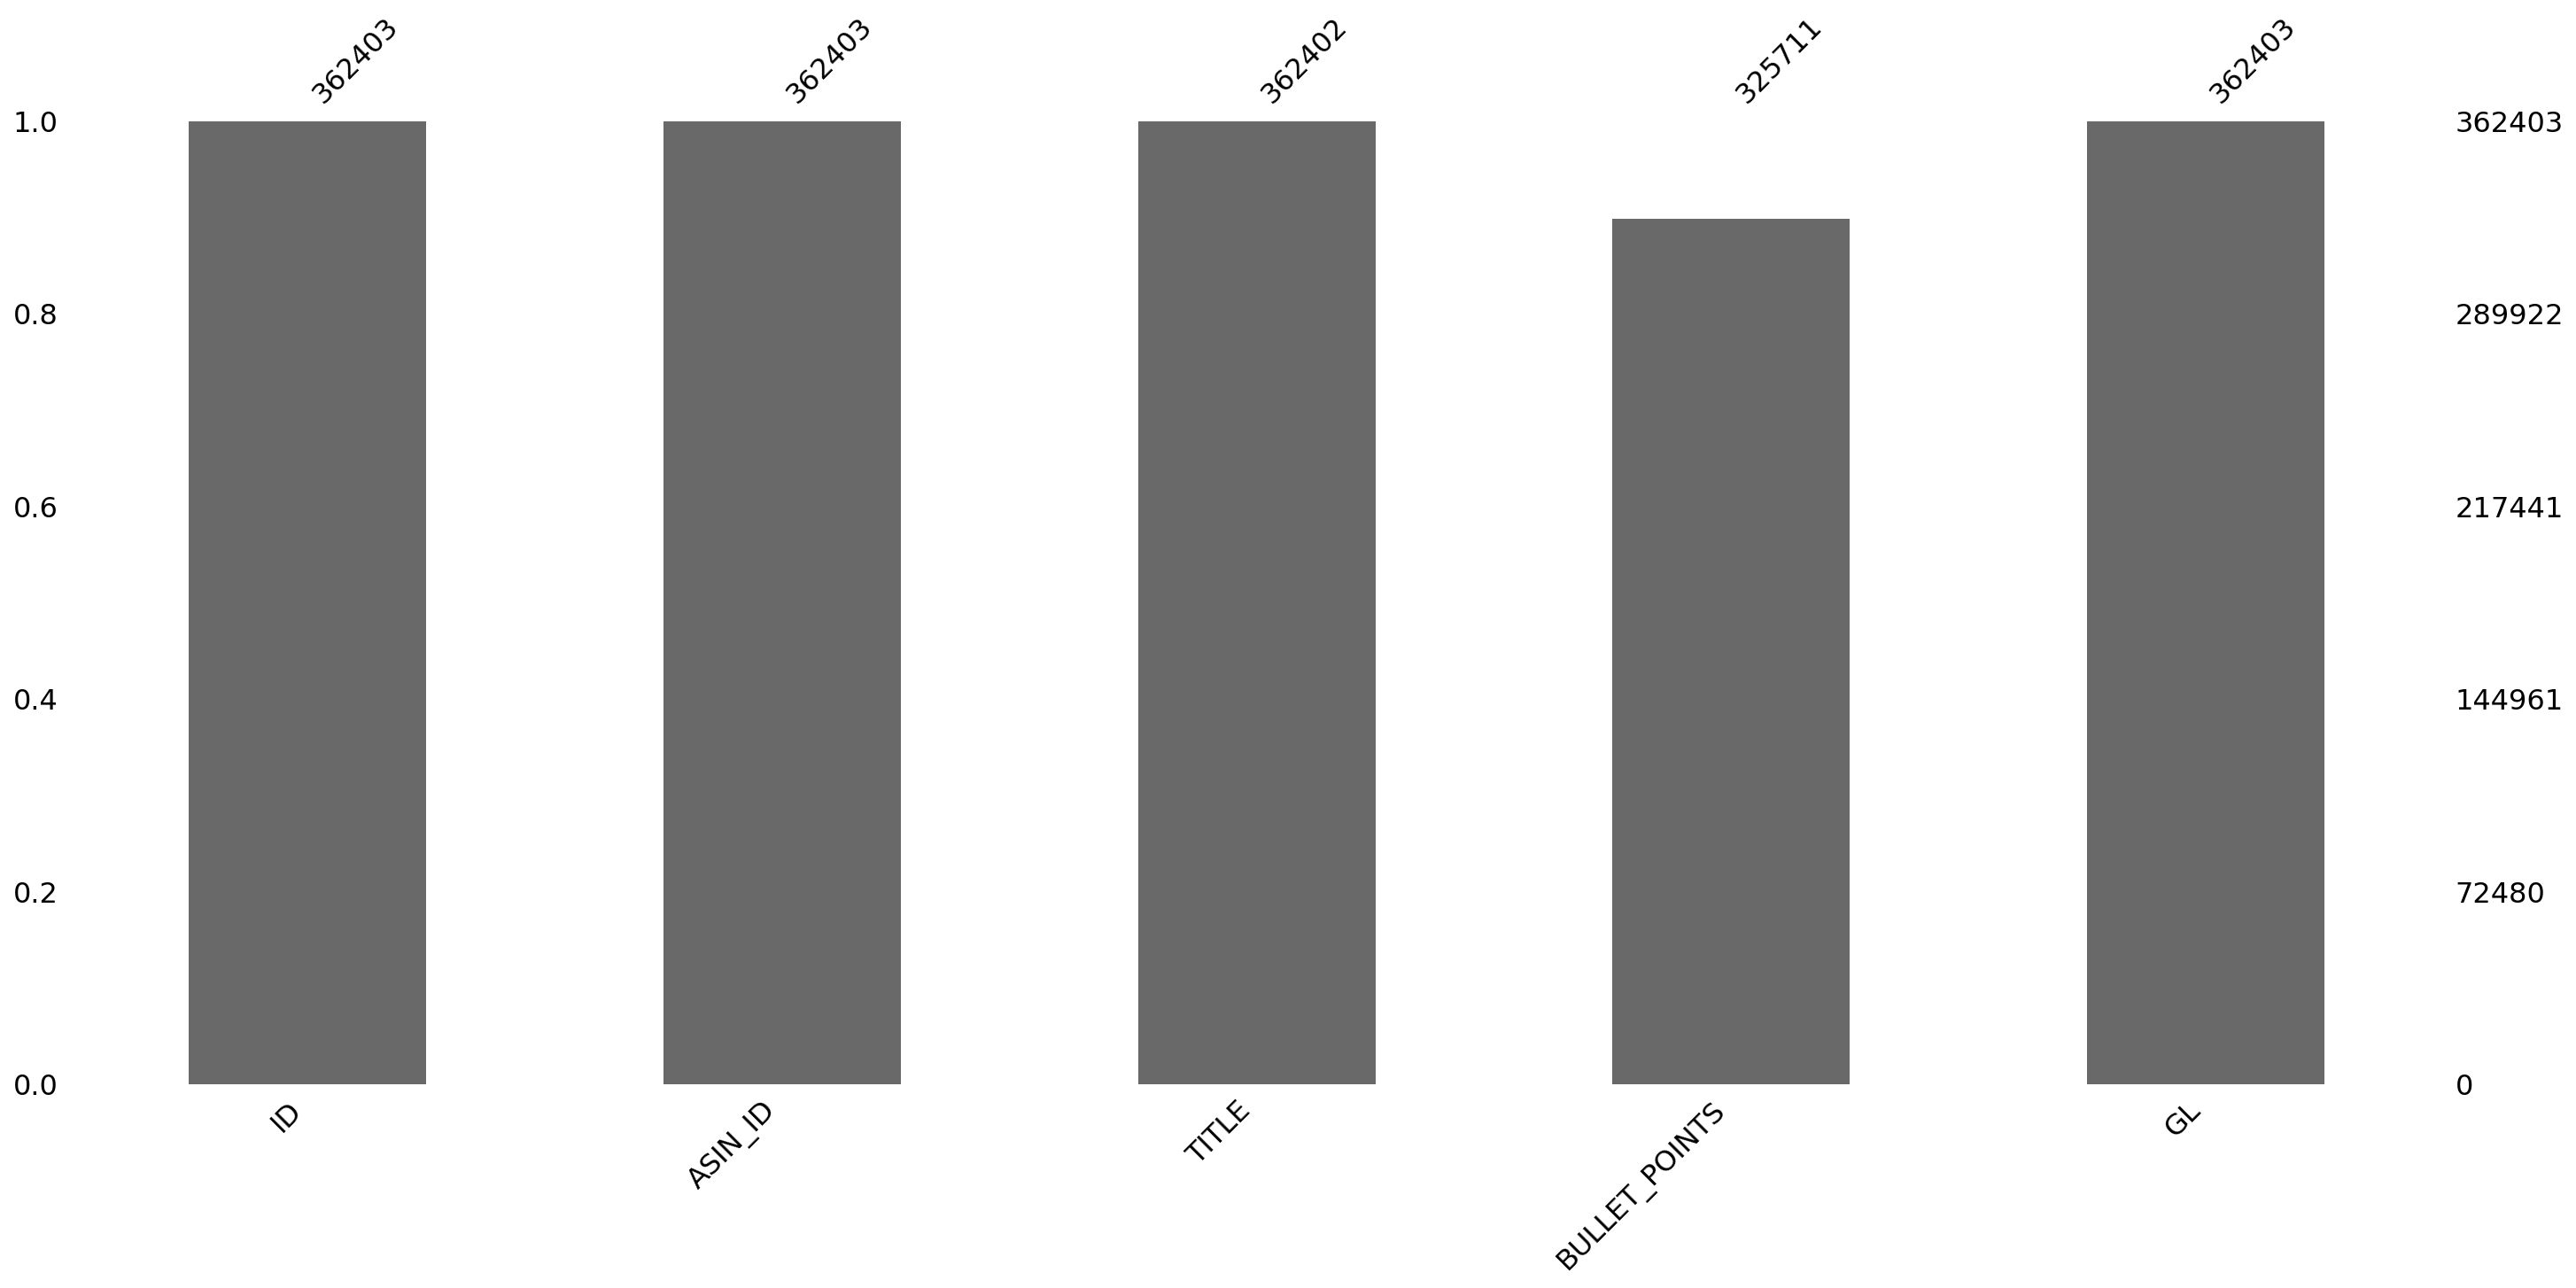

In [4]:
msno.bar(df_train)
msno.bar(df_test)

In [5]:
df_train.GL.nunique()
df_test.GL.nunique()

set(df_test.GL.unique()) - set(df_train.GL.unique())

61

56

{'gl_bill_payments', 'gl_digital_products_3_accessory', 'gl_kindle_unlimited'}

In [6]:
df_train.columns

Index(['ID', 'ASIN_ID', 'TITLE', 'BULLET_POINTS', 'GL', 'PRICE'], dtype='object')

# Preprocessing Data

In [3]:
import sys
import os
sys.path.append(os.getcwd())
from importlib import reload
import lib
reload(lib)
from lib import *

<module 'lib' from '/home/ec2-user/SageMaker/ML_hackathon_2019/lib.py'>

In [4]:
df_train = preprocess_for_word_cnn(df_train,jobs=32)
gl_le_train,gl_le_transform, le = get_text_le("text")
_ = gl_le_train(df_train)
df_train['text_encoded'] = gl_le_transform(df_train)




Total Words before Min frequency filtering 332242
Total Words after Min frequency filtering 87552


In [5]:
df_test = preprocess_for_word_cnn(df_test,jobs=32)
df_test['text_encoded'] = gl_le_transform(df_test)

In [6]:
df_train = preprocess_for_char_cnn(df_train,jobs=32)
df_test = preprocess_for_char_cnn(df_test,jobs=32)
char_le_train,char_le_transform, char_le = get_char_le("char")
_ = char_le_train(df_train)

df_train['char_encoded'] = char_le_transform(df_train)
df_test['char_encoded'] = char_le_transform(df_test)



Total Words before Min frequency filtering 1500
Total Words after Min frequency filtering 272


In [9]:
char_le['wd']

{' ': 2,
 'e': 3,
 'a': 4,
 'o': 5,
 't': 6,
 'r': 7,
 'i': 8,
 'n': 9,
 's': 10,
 'l': 11,
 'c': 12,
 'h': 13,
 'd': 14,
 'u': 15,
 'g': 16,
 ',': 17,
 'p': 18,
 'm': 19,
 'y': 20,
 'f': 21,
 'S': 22,
 'C': 23,
 'b': 24,
 'w': 25,
 'k': 26,
 'P': 27,
 'v': 28,
 'M': 29,
 'T': 30,
 ':': 31,
 'B': 32,
 '.': 33,
 'A': 34,
 '-': 35,
 '_': 36,
 '0': 37,
 'L': 38,
 'D': 39,
 'F': 40,
 'I': 41,
 'W': 42,
 'E': 43,
 '1': 44,
 'R': 45,
 'O': 46,
 'H': 47,
 'G': 48,
 'N': 49,
 '2': 50,
 '[': 51,
 ']': 52,
 'x': 53,
 ')': 54,
 '(': 55,
 '3': 56,
 '5': 57,
 'U': 58,
 '4': 59,
 'z': 60,
 '6': 61,
 'K': 62,
 "'": 63,
 '8': 64,
 '/': 65,
 'V': 66,
 '7': 67,
 '9': 68,
 'Y': 69,
 '&': 70,
 'q': 71,
 'X': 72,
 '%': 73,
 '"': 74,
 ';': 75,
 'j': 76,
 'J': 77,
 'Q': 78,
 '\\': 79,
 '|': 80,
 'Z': 81,
 '*': 82,
 '+': 83,
 '!': 84,
 '\xa0': 85,
 '=': 86,
 '>': 87,
 '’': 88,
 '<': 89,
 '?': 90,
 '–': 91,
 '#': 92,
 '®': 93,
 '★': 94,
 '✔': 95,
 'é': 96,
 '”': 97,
 '™': 98,
 '°': 99,
 '•': 100,
 '❤': 101,
 '

In [10]:
sorted(char_le['wd'].keys())

[' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '«',
 '®',
 '°',
 '·',
 '»',
 'Â',
 'Ã',
 '×',
 'â',
 'é',
 'ा',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…',
 '€',
 '™',
 '★',
 '♥',
 '✅',
 '✔',
 '✿',
 '❤',
 '➤',
 '【',
 '】',
 '️']

In [11]:
df_train.head()

,ID,ASIN_ID,TITLE,BULLET_POINTS,GL,PRICE,text,text_encoded,char,char_encoded
0,1489960,B07HNQBLZH,"Livsmart Resin Jewellery Display Stand, 17x11c...",[Holds rings and other small items especially ...,gl_jewelry,507.62,"[livsmart, resin, jewellery, display, stand, _...","[28683, 1558, 273, 310, 196, 8, 4, 31, 453, 33...","Livsmart Resin Jewellery Display Stand, 17x11c...","[38, 8, 28, 10, 19, 4, 7, 6, 2, 45, 3, 10, 8, ..."
1,633493,B00MTZ726Y,Quantum Creation: Does the Supernatural Lurk i...,NaN,gl_digital_ebook_purchase,479.90,"[quantum, creation, supernatural, lurk, fourth...","[7567, 879, 12991, 1, 3900, 207, 267]",Quantum Creation: Does the Supernatural Lurk i...,"[78, 15, 4, 9, 6, 15, 19, 2, 23, 7, 3, 4, 6, 8..."
2,1474591,B015MZ3NJW,IZOD Men's Casual Shirt (8907163477392_ZKSH019...,"[Cotton linen,Cotton linen shirt,Checkered pat...",gl_apparel,829.28,"[izod, men, casual, shirt, _NUM30_, _zksh, _NU...","[5244, 24, 35, 32, 127, 26671, 64, 5368, 9, 90...",IZOD Men's Casual Shirt (8907163477392_ZKSH019...,"[41, 81, 46, 39, 2, 29, 3, 9, 63, 10, 2, 23, 4..."
3,830218,B079DNYB4N,"Dishaa Women's Rayon A-Line Kurta (Black, X-La...","[Material: Rayon,Color: Black ; Work: Threaded...",gl_apparel,648.31,"[dishaa, woman, rayon, line, kurta, black, lar...","[45999, 21, 572, 192, 222, 31, 133, 2162, 369,...","Dishaa Women's Rayon A-Line Kurta (Black, X-La...","[39, 8, 10, 13, 4, 4, 2, 42, 5, 19, 3, 9, 63, ..."
4,201144,B00XHH7LBY,Return of the Ravens (Ulfrik Ormsson's Saga Bo...,NaN,gl_digital_ebook_purchase,332.00,"[return, raven, ulfrik, ormsson, saga, book, _...","[854, 13891, 1, 1, 7870, 597, 2, 267]",Return of the Ravens (Ulfrik Ormsson's Saga Bo...,"[45, 3, 6, 15, 7, 9, 2, 5, 21, 2, 6, 13, 3, 2,..."


In [7]:
# Intermediate save
df_test[["ID","GL","text","text_encoded","char","char_encoded"]].to_csv("price_prediction/test.csv",index=False)
df_train[["ID","GL","text","text_encoded","char","char_encoded","PRICE"]].to_csv("price_prediction/train.csv",index=False)



In [15]:
# What is the max word length of an asin?

max_len = 0
for c in df_train.text:
    max_len = max(max_len,len(c))
print(max_len)

df_train.text.apply(len).mean()
df_train.text.apply(len).max()

np.percentile(df_train.text.apply(len), [1,5,95,99])

558


43.8424498209171

558

array([  4.,   9., 108., 158.])

In [16]:
# What is the max character length of an asin?

max_len = 0
for c in df_train.char:
    max_len = max(max_len,len(c))
print(max_len)

df_train.char.apply(len).mean()

np.percentile(df_train.char.apply(len), [1,5,95,99])

4186


355.25368168497965

array([  41.,   69.,  955., 1423.])

4186

In [ ]:
start = time()
glove = api.load("glove-twitter-25") 
print("total = ",(time()-start))

ptr_glove = PreTrainedEmbeddingsTransformer(glove,size=25)
ptr_glove.fit()


In [18]:
ptr_glove.transform(df_train['text'].head().values)

Fasttext Transforms start at: 2019-06-12 20:48:33.769052
Number of Unique Test Tokens for Fasttext transform 105


/home/ec2-user/SageMaker/ML_hackathon_2019/lib.py:230: RuntimeWarning: invalid value encountered in true_divide
  token2vec = {k: self.model.wv[k] if k in self.model.wv else empty for k in uniq_tokens}


Fasttext Transforms done at: 2019-06-12 20:48:33.798613


array([list([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.]), array([-0.34577322, -0.24588524,  0.05102374, -0.10197101,  0.08651397,
        0.07678932, -0.1665935 , -0.3043444 ,  0.32156006, -0.18454368,
        0.17527086,  0.09763581, -0.34966585, -0.08168061, -0.13189802,
        0.0683877 ,  0.09058966,  0.13328592,  0.16063175,  0.39769828,
       -0.30992848,  0.00171429,  0.18304455,  0.02893994, -0.06448579],
      dtype=float32), array([-0.3268838 , -0.13950849, -0.07745891, -0.19274539,  0.14657307,
       -0.13236557, -0.09916801, -0.3344287 , -0.03204315, -0.14627622,
        0.25205323, -0.01479604, -0.4430464 , -0.06483459, -0.2673904 ,
       -0.09216734,  0.11876208, -0.17181139,  0.07366584,  0.25502172,
       -0.27456424, -0.23463401, -0.1821145 ,  0.0150461 , -0.15898505],
      dtype=float32), array([ 0.04465171, -0.1731172 , -0.01628751, -0.11452806,  0.32375216,
       -0.02755725,  0.10969554, 

In [20]:

df_test[["ID","GL","text","text_encoded","char","char_encoded"]].to_csv("price_prediction/test.csv",index=False)
df_train[["ID","GL","text","text_encoded","char","char_encoded","PRICE"]].to_csv("price_prediction/train.csv",index=False)


In [19]:
df_test['glove_encoded'] = ptr_glove.transform(df_test['text'].values)
df_train['glove_encoded'] = ptr_glove.transform(df_train['text'].values)


df_test[["ID","GL","text","text_encoded","char","char_encoded","glove_encoded"]].to_csv("price_prediction/test.csv",index=False)
df_train[["ID","GL","text","text_encoded","char","char_encoded","glove_encoded","PRICE"]].to_csv("price_prediction/train.csv",index=False)


Fasttext Transforms start at: 2019-06-12 20:49:31.612184
Number of Unique Test Tokens for Fasttext transform 160522


/home/ec2-user/SageMaker/ML_hackathon_2019/lib.py:230: RuntimeWarning: invalid value encountered in true_divide
  token2vec = {k: self.model.wv[k] if k in self.model.wv else empty for k in uniq_tokens}


Fasttext Transforms done at: 2019-06-12 20:49:44.720385
Fasttext Transforms start at: 2019-06-12 20:49:44.740831
Number of Unique Test Tokens for Fasttext transform 332242


Fasttext Transforms done at: 2019-06-12 20:50:35.406689


KeyboardInterrupt: 

In [ ]:
start = time()
fasttext = api.load("fasttext-wiki-news-subwords-300") 
print("total = ",(time()-start))

ptr = PreTrainedEmbeddingsTransformer(fasttext,size=300)
ptr.fit()


import gc
gc.collect()

In [ ]:

df_test['fasttext_encoded'] = ptr.transform(df_test['text'].values)
df_test[["ID","GL","text","text_encoded","char","char_encoded","fasttext_encoded"]].to_csv("price_prediction/test.csv",index=False)
gc.collect()

In [ ]:
# Intermediate save
df_train['fasttext_encoded'] = ptr.transform(df_train['text'].values)
df_train[["ID","GL","text","text_encoded","char","char_encoded","fasttext_encoded","PRICE"]].to_csv("price_prediction/train.csv",index=False)

